## Bagging

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [34]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [36]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [37]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [38]:
X = df.drop('Outcome', axis='columns')
y = df.Outcome
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [39]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:3]

array([[ 0.63994726,  0.84832379,  0.14964075,  0.90726993, -0.69289057,
         0.20401277,  0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575,  0.53090156, -0.69289057,
        -0.68442195, -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, -1.28821221, -0.69289057,
        -1.10325546,  0.60439732, -0.10558415]])

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, random_state=10)


In [41]:
X_train.shape

(576, 8)

In [42]:
X_test.shape

(192, 8)

In [43]:
y_train.value_counts()

Outcome
0    375
1    201
Name: count, dtype: int64

In [44]:
models = {
    "Bagging": BaggingClassifier(
        estimator=DecisionTreeClassifier(),
        n_estimators=100,
        max_samples=0.8,
        oob_score=True,
        random_state=0
    ),
    "Random Forest": RandomForestClassifier(
        n_estimators=100,
        max_depth=5,
        min_samples_leaf=5,
        min_samples_split=10,
        random_state=0
    ),
    "AdaBoost": AdaBoostClassifier(
        estimator=DecisionTreeClassifier(max_depth=1),
        n_estimators=100,
        random_state=0
    ),
    "XGBoost": XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=0
    )
}

In [49]:
results = {}
for name, model in models.items():
    
    cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    
  
    model.fit(X_train, y_train)
    
   
    test_accuracy = model.score(X_test, y_test)
    
    
    results[name] = {
        "Cross-Validation Mean Accuracy": cv_mean,
        "Testing Accuracy": test_accuracy
    }
    print(f"--- {name} ---")
    print(f"Cross-Validation Mean Accuracy: {cv_mean:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print()

--- Bagging ---
Cross-Validation Mean Accuracy: 0.7592
Testing Accuracy: 0.7760

--- Random Forest ---
Cross-Validation Mean Accuracy: 0.7670
Testing Accuracy: 0.8021

--- AdaBoost ---
Cross-Validation Mean Accuracy: 0.7670
Testing Accuracy: 0.7969

--- XGBoost ---
Cross-Validation Mean Accuracy: 0.7709
Testing Accuracy: 0.7812



In [47]:
results_df = pd.DataFrame(results).T
print("\nCombined Results:")
print(results_df)


Combined Results:
               Cross-Validation Mean Accuracy  Testing Accuracy
Bagging                              0.759180          0.776042
Random Forest                        0.766972          0.802083
AdaBoost                             0.767006          0.796875
XGBoost                              0.770877          0.781250


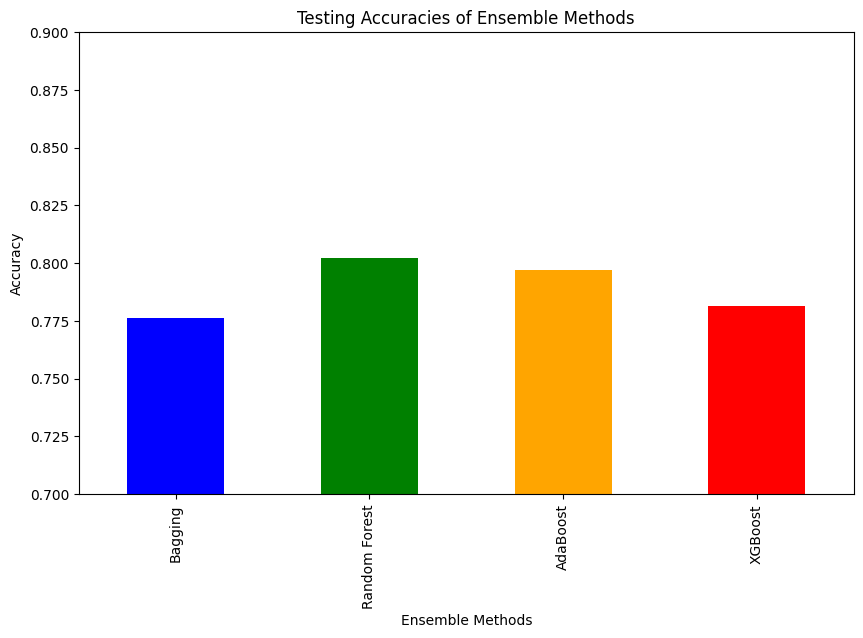

In [48]:
plt.figure(figsize=(10, 6))
results_df["Testing Accuracy"].plot(kind='bar', color=['blue', 'green', 'orange', 'red'])
plt.xlabel('Ensemble Methods')
plt.ylabel('Accuracy')
plt.title('Testing Accuracies of Ensemble Methods')
plt.ylim(0.7, 0.9)  # Set y-axis limits for better visualization
plt.show()